# Multi-Layer Perceptron

### What is a Multi-Layer Perceptron?
- A Multilayer Perceptron has input and output layers, and one or more hidden layers with many neurons stacked together. And while in the Perceptron the neuron must have an activation function that imposes a threshold, like the sigmoid function, neurons in a Multilayer Perceptron can use any arbitrary activation function.


![alt text](https://miro.medium.com/max/563/1*4_BDTvgB6WoYVXyxO8lDGA.png)

### Pros and Cons
Pros:
- Can be applied to complex non linear problems.

- Works well with large datasets.

- Has quick predictions after training for the most part.

- Its accuracy ratio works well throughout all different sizes of data.

Cons:
- Computations are difficult and time consuming.

- Isnt know how bad the depend variables affect the independent variables.

- The proper functioning of our model depends on the quality of training.




In [85]:
#!pip install tensorflow
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Use the keras module to import the necessary data 
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()


In [86]:
print(train_X.shape)

(60000, 28, 28)


In [87]:
# This cell should be run inplace of the cell directly above
print(f"np.shape(train_X) ={np.shape(train_X)}")
print(f"np.shape(test_X) = {np.shape(test_X)} \n")

print(f"np.shape(train_X[0]) = {np.shape(train_X[0])}")
print(f"np.shape(test_X[0]) = {np.shape(test_X[0])} \n")

print(f"train_X[0] = {train_X[0]}")


np.shape(train_X) =(60000, 28, 28)
np.shape(test_X) = (10000, 28, 28) 

np.shape(train_X[0]) = (28, 28)
np.shape(test_X[0]) = (28, 28) 

train_X[0] = [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0  

### Showing our labels:
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

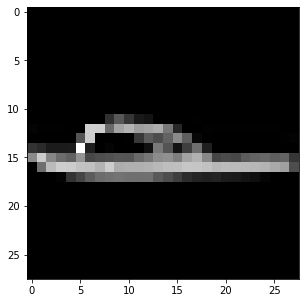

label:  5


In [89]:
sample=30
# print(f"{train_y[0] = } \n")
plt.figure(figsize=(6, 5))
plt.imshow(train_X[sample], cmap="gray")
plt.show()
print('label: ',train_y[sample])

## Prepare dataset for Training

In [91]:
train_X=train_X/255
test_X=test_X/255

In [92]:
train_X=train_X.reshape(train_X.shape[0],-1)
test_X=test_X.reshape(test_X.shape[0],-1)

In [93]:
train_X.shape,test_X.shape

((60000, 784), (10000, 784))

### Train Model: Fully Connected NN

In [94]:
train_y

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [95]:
from keras.models import Sequential
from keras.layers import Dense

In [96]:
model=Sequential()
model.add(Dense(512,input_dim=train_X.shape[1],activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 64)                16448     
                                                                 
 dense_18 (Dense)            (None, 10)                650       
                                                                 
Total params: 550,346
Trainable params: 550,346
Non-trainable params: 0
_________________________________________________________________


In [97]:
test_X.shape

(10000, 784)

In [98]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [99]:
history=model.fit(train_X,train_y,validation_data=(test_X,test_y),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4798 - accuracy: 0.8265 - val_loss: 0.4544 - val_accuracy: 0.8401
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3633 - accuracy: 0.8662 - val_loss: 0.3767 - val_accuracy: 0.8626
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3256 - accuracy: 0.8799 - val_loss: 0.3786 - val_accuracy: 0.8608
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3004 - accuracy: 0.8891 - val_loss: 0.3510 - val_accuracy: 0.8754
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2842 - accuracy: 0.8942 - val_loss: 0.3552 - val_accuracy: 0.8716
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2681 - accuracy: 0.8995 - val_loss: 0.3509 - val_accuracy: 0.8767
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2571 - accuracy: 0.9038 - val_loss: 0.3760 - val_accuracy:

Accuracy measures how well or bad the model performs: 0 - 1: the closer to 1 the better. We also want to see our loss to continuously go down as well.

Text(0, 0.5, 'Loss')

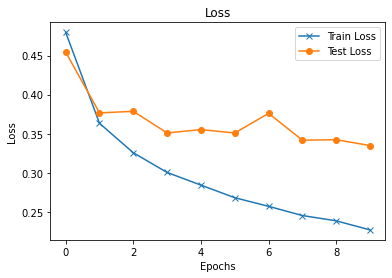

In [100]:
train_loss=history.history['loss']
test_loss=history.history['val_loss']

plt.title('Loss')
plt.plot(train_loss,marker='x',label='Train Loss')
plt.plot(test_loss,marker='o',label='Test Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

Typically our plots should look like this showing us our Training loss and Test loss.

In [35]:
model.predict(test_X).argmax(1)

array([9, 2, 1, ..., 8, 1, 5])

In [36]:
test_y

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

these two prediction test X and test y should both come back the same.

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(test_y,model.predict(test_X).argmax(1))

0.878

### Train Model: Convolutional NN

In [101]:
# Use the keras module to import the necessary data 
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

In [102]:
train_X.shape

(60000, 28, 28)

In [103]:
train_X=np.expand_dims(train_X,axis=-1)
test_X=np.expand_dims(test_X,axis=-1)

In [104]:
train_X.shape

(60000, 28, 28, 1)

In [105]:
train_X=train_X/255
test_X=test_X/255

In [106]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Flatten,MaxPool2D

In [107]:
model=Sequential()
model.add(Conv2D(16,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())


model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 64)        

In [108]:
test_X.shape

(10000, 28, 28, 1)

We have to add another dimension here for our picture.

In [109]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [110]:
history=model.fit(train_X,train_y,validation_data=(test_X,test_y),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.6701 - accuracy: 0.7526 - val_loss: 0.5333 - val_accuracy: 0.8101
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4462 - accuracy: 0.8364 - val_loss: 0.4280 - val_accuracy: 0.8410
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3827 - accuracy: 0.8582 - val_loss: 0.3795 - val_accuracy: 0.8600
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3465 - accuracy: 0.8732 - val_loss: 0.3661 - val_accuracy: 0.8675
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3198 - accuracy: 0.8821 - val_loss: 0.3954 - val_accuracy: 0.8553
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3003 - accuracy: 0.8902 - val_loss: 0.3398 - val_accuracy: 0.8815
Epoch 7/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2835 - accuracy: 0.8965 - val_loss: 0.3279 -

Text(0, 0.5, 'Loss')

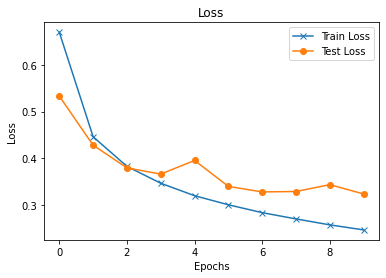

In [111]:
train_loss=history.history['loss']
test_loss=history.history['val_loss']

plt.title('Loss')
plt.plot(train_loss,marker='x',label='Train Loss')
plt.plot(test_loss,marker='o',label='Test Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [113]:
test_y_pred=model.predict(test_X).argmax(1)
test_y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [114]:
test_y

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

As before these two prediction test y and test y should both come back the same.

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
accuracy_score(test_y,model.predict(test_X).argmax(1))

0.8798

Now lets look at our label predictions.

True label  4
Predicted label  6


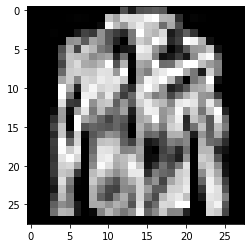

True label  5
Predicted label  7


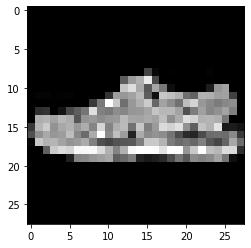

True label  9
Predicted label  5


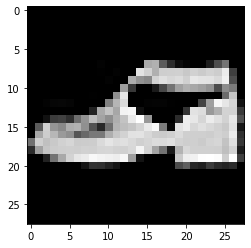

True label  4
Predicted label  2


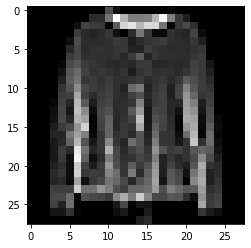

True label  3
Predicted label  4


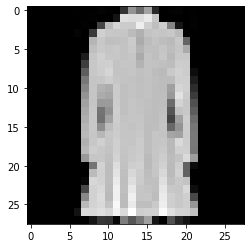

In [118]:
for ii,sample in enumerate(test_X[:30]):
    if test_y[ii]!= test_y_pred[ii]:
        print('True label ',test_y[ii])
        print('Predicted label ',test_y_pred[ii])
        plt.imshow(test_X[ii,:,:,0],cmap="gray")
        plt.show()
    